# Desplazamiento transversal de una viga usando métodos de aproximación
> Fabián Catalán | Miguel Nahuelpan | Felipe Zabala

> Software de Ingeniería, Universidad Austral de Chile, 2019

<img src="./img/VIGA.png" width="300">

## Problema
La ecuación que gobierna el desplazamiento transversal de una **viga sobre una fundación elástica de rigidez 𝑘** es
$$EI=\frac{d^4y}{dx^4}+k \cdot y = w(x).$$

donde $EI$ es la rigidez flexional de la viga (constante) y $w(x)$ la carga distribuida por unidad de longitud. Si la viga (de longitud unitaria) está empotrada en ambos extremos (𝑢 = 𝑑𝑢/𝑑𝑥 = 0 en 𝑥 = 0 y 𝑥 = 1).. Resolver para el caso en que $$\frac{𝑤(𝑥)}{𝐸𝐼} = \frac{𝑘}{𝐸𝐼} = 1.$$(2). Comparar con la solución exacta.
Resolver el problema utilizando los métodos de aproximación, considerando tres funciones de prueba (𝜑𝑖):
1. Colocación, el usuario deberá seleccionar los puntos de colocación.
2. Subdominios, el usuario deberá seleccionar los dominios.
3. Mínimos cuadrados.
4. Momentos.
5. Galerkin.

### Resolución
Primero debemos observar el caso en particular que nos dan $$\frac{w(x)}{EI}=\frac{k}{EI}=1.$$(1) 
A partir de estas condiciones de **borde** despejaremos la función principal.
$$EI=\frac{d^4y}{dx^4}+k \cdot y = \frac{w(x)}{EI} /EI.$$
$$\frac{EI}{EI}=\frac{d^4y}{dx^4}+ \frac{k \cdot y}{EI} = \frac{w(x)}{EI}.$$(2)
Usando condiciones tenemos la ecuación simplificada que usaremos para calcular la solución aproximada.
$$\frac{d^4y}{dx^4} + y = 1$$
Se emplea una función de aproximación u quedando la función que modela el problema como sigue
$$\frac{d^4 \tilde{u}}{dx^4} + \tilde{u} = 1$$
Se debe encontrar esta **función residual** que cumpla las condiciones de borde iniciales

### Planteamiento de función residual (Residuos Pesados)
Sea $$\tilde{u}(x) = y(x).$$ una aproximación a la solución que gobierna el desplazamiento tranversal del problema, se debe encontrar la función u tal que se cumpla la ortonormalidad $$u(0)=u'(0)=0.$$ y $$u(1)=u'(1)=0.$$
Para ello las funciones residuales deben cumplir: $$R(x,y)=0$$  $$R(x,\tilde{u})=0 $$
Se define $$\tilde{u}(x)= a_1\varphi(x)+a_2\varphi(x)+a_3\varphi(x).$$ como la función residuo que por medios de métodos de aproximación encuentran una solución aproximada al problema. Se debe obtener la derivada de esta función como sigue
$$\tilde{u}'(x)= a_1\varphi'(x)+a_2\varphi'(x)+a_3\varphi'(x).$$

> El desafío es encontrar funciones de prueba que satisfagan $$\varphi=\varphi'=0 \quad en \; x=0 \; y \;  x=1$$ 

In [1]:
import numpy as np
import math
from datetime import datetime
from IPython.display import display, Math
from sympy.printing.latex import LatexPrinter, print_latex
!jupyter nbextension enable --sys-prefix --py widgetsnbextension
from sympy import *
from sympy import init_printing
init_printing()
a1,a2,a3,x = symbols('a1,a2,a3,x')
import matplotlib.pyplot as plt

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Funcion de prueba 
Por condiciones iniciales se tiene que u = du/dx = 0 en x = 0 y x = 1. Esto implica que debemos encontrar funciones de prueba 𝜑𝑖 que cumplan con las condiciones para que u y du den cero en dichos puntos. Usando prueba y error, el código automatizado de búsqueda de las funciones es la siguiente 

In [2]:
p = x*(x-1)*sin( pi * x) # probar función acá. PD: reemplzar por math.pi

print("p=%s"%p)
dp = diff(p,x)
print("p'=%s"%dp)

p0 = round(p.subs(x,0),3)
p1 = round(p.subs(x,1),3)
dp0 = round(dp.subs(x,0),3)
dp1 = round(dp.subs(x,1),3)

print("p(0)=%s"%p0)
print("p(1)=%s"%p1)
print("p'(0)=%s"%dp0)
print("p'(1)=%s"%dp1)

if(p0 == p1 ==dp0 ==dp1 ==0):
    print("Funcion de prueba encontrada")
else:
    print("siga intentando..")

p=x*(x - 1)*sin(pi*x)
p'=pi*x*(x - 1)*cos(pi*x) + x*sin(pi*x) + (x - 1)*sin(pi*x)
p(0)=0.0
p(1)=0.0
p'(0)=0.0
p'(1)=0.0
Funcion de prueba encontrada


## Definición de funciones y variables

### Funciones de prueba

In [3]:
f1=x*(x - 1)*sin(pi*x)
f2=x**2*(x - 1)*sin(pi*x)
f3=x**3*(x - 1)*sin(pi*x)

### Definición de función residuo

In [4]:
u = a1*f1+a2*f2+a3*f3
du = diff(u,x)
d4u=diff(diff(diff(diff(u,x),x),x),x)
print_latex("du/dx")
Eq(du)

du/dx


In [5]:
R = d4u + u -1
print_latex("R(x)=")
Eq(R)

R(x)=


In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
from ipywidgets import Layout, FloatSlider, IntSlider
slider_layout = Layout(width='70%', height='20x');
from ipywidgets import interact, interactive
from ipykernel.pylab.backend_inline import flush_figures
%matplotlib inline
u1=u2=u3=u4=u5=[] #soluciones aproximadas

def calcular(ec1,ec2,ec3):
    M = linear_eq_to_matrix([ec1,ec2,ec3],[a1,a2,a3])
    A = np.array(M[0]).astype(np.float64)
    b = np.array(M[1]).astype(np.float64)
    S = np.linalg.solve(A,b)
    print(S)
    return S
    
def graficar(metodo, S):
    U = u
    U = U.subs(a1,S[0]).subs(a2,S[1]).subs(a3,S[2])
    print("u(x) = %s" % U)
    xi = np.arange(0,1.01,0.01)
    y = []
    [y.append(U.subs(x,i)) for i in xi]
    y = np.array(y).astype(np.float64) #convertir de lista a array de numpy acelera los gráficos
    print("Punto Max:%f" % np.max(y))
    #graficar
    plt.figure(2)
    plt.style.use("seaborn")
    plt.plot(xi,y)
    plt.title('Método de %s' % metodo)
    plt.xlabel('Posición')
    plt.ylabel('Desplazamiento transversal de la viga')
    plt.show()
    flush_figures();
    return y

## Métodos de Aproximación
Se reemplaza la cuarta derivada de la función residual y la función residual misma en $$\frac{d^4 \tilde{u}}{dx^4} + \tilde{u} = 1$$ Luego se toman 3 puntos de colocación dentro del intervalo ]0,1\[ que minimizan el error de aproximación en la región de interés. 


### Colocación
Se utilizará una función de aproximación de la forma: $$\tilde{u}(x)=\Sigma a_i\varphi_i(x)$$ donde se tienen 3 funciones de prueba $$\varphi_1(x)=x(x-1)sen(\pi x)$$  $$\varphi_2(x)=x^2(x-1)sen(\pi x)$$  $$\varphi_3(x)=x^3(x-1)sen(\pi x)$$ y las constantes $$a_1,a_2,a_3$$ además de las condiciones de frontera $$\tilde{u}(0)=0, \tilde{u}(1)=0, \tilde{u}'(0)=0, \tilde{u}'(1)=0$$ 

Se deben cumplir las condiciones de borde por tanto: $$\tilde{u}(0) = 0 $$ , $$\tilde{u}(1) = 0$$ , $$\tilde{u'}(0) = 0 $$ y $$\tilde{u'}(1) = 0 $$ Se calcula el residual con el que se trabajará: $$R(x)= \frac{d^4 \tilde{u}}{dx^4} + \tilde{u} - 1 = 0$$ Más adelante se solicitarán 3 puntos entre ]0,1\[ para obtener las constantes $$a_1,a_2,a_3$$

In [7]:
p1 = FloatSlider(min=0.05, max=0.95, step=0.05, value=0.25,description="Punto 1")
p2 = FloatSlider(min=0.05, max=0.95, step=0.05, value=0.50,description="Punto 2")
p3 = FloatSlider(min=0.05, max=0.95, step=0.05, value=0.75,description="Punto 3")

def graficar_colocacion(p_1, p_2, p_3):
    global u1
    if(0 < p_1 < p_2 < p_3 < 1):
        ec1 = R.subs(x,p_1)
        ec2 = R.subs(x,p_2)
        ec3 = R.subs(x,p_3)
        u1 = graficar('Colocación Ortogonal',calcular(ec1,ec2,ec3))
    else:
        return "Puntos deben ser distintos"
    
interact(graficar_colocacion,p_1=p1, p_2=p2, p_3=p3, description="Puntos de colocación", layout=slider_layout);

interactive(children=(FloatSlider(value=0.25, description='Punto 1', max=0.95, min=0.05, step=0.05), FloatSlid…

## Método de Subdominios
Dada la función residual R, podemos determinar las integrales por subdominios para obtener una solución aproximada. Se solicitan los subdominios al usuario. 


En este método se utilizara el R(x) obtenido anteriormente y a partir de este se calculará una aproximación de solución mediante la realización de 3 integrales definidas entre ]0,1\[ siendo esta: $$\int_0^a R(x) dx $$ $$ \int_a^b R(x) dx $$ $$ \int_b^1 R(x) dx$$ siendo a y b entregados por el usuario, luego de resolver esas integrales se obtiene un sistema de ecuaciones, mediante el cual se calculan las constantes: $$a_1, a_2, a_3$$

In [8]:
X=[] #almacena las ecuaciones
I=integrate(R, x)#realiza la integral del residuo

In [9]:
p1 = FloatSlider(min=0.05, max=1, step=0.05, value=0.35,description="Subdominio 1")
p2 = FloatSlider(min=0.05, max=1, step=0.05, value=0.55,description="Subdominio 2")

def subdominios(p_1,p_2):
    global u2
    ite = 0
    X=[]
    if(p_1 < p_2 < 1 ):
        h = [p_1,p_2,1]
        for i in range(3):
            print("%i Integral[%f,%f] "%(i,ite,h[i]))
            b = I.subs(x, h[i])
            a = I.subs(x, ite)
            X.append(b-a) #calcula el valor de la integral 
            ite = h[i] #cambia el rango de integracion
        u2 = graficar("Subdominios", calcular(X[0],X[1],X[2]))
    else:
        return "Puntos deben ser distintos y valores uno mayor que el anterior, menor a 1."


interact(subdominios,p_1=p1, p_2=p2, layout=slider_layout);

interactive(children=(FloatSlider(value=0.25, description='Subdominio 1', max=1.0, min=0.05, step=0.05), Float…

## Método de Mínimos Cuadrados
> El cálculo tiene una duración promedio de un minuto.

En este método se aplicará la siguiente integral:

Sea $$ \int_0^1 W_iR(x) dx $$ donde $$W_i = \frac{\partial R}{\partial a_i}dx = 0 $$ las constantes en este caso serán 3, quedando las integrales de la siguiente forma: $$\int_0^1 \frac{\partial R}{\partial a_1}dxR(x) dx$$ $$\int_0^1 \frac{\partial R}{\partial a_2}dxR(x) dx$$ $$\int_0^1 \frac{\partial R}{\partial a_3}dxR(x) dx$$ Resueltas las integrales anteriores se obtiene un sistema de ecuaciones, mediante el cual se calculan las constantes.

Integral respecto a a1 procesada.. espere
Integral respecto a a2 procesada.. espere
Integral respecto a a3 procesada
[[-0.01283586]
 [ 0.01228875]
 [-0.01228875]]
u(x) = -0.0122887461959945*x**3*(x - 1)*sin(pi*x) + 0.0122887461959945*x**2*(x - 1)*sin(pi*x) - 0.0128358609472298*x*(x - 1)*sin(pi*x)
Punto Max:0.002441


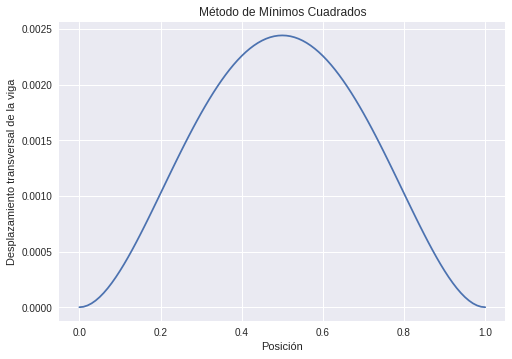

Tiempo de ejecución: 2 min. 57.950340 segs


In [11]:
t1 = datetime.now()
dRda1=diff(R, a1) #derivada de R respecto a a1
x1=integrate(R*dRda1, (x,0,1)) #integral de la derivada por el residuo
print("Integral respecto a a1 procesada.. espere")

dRda2=diff(R, a2) #derivada de R respecto a a2
x2=integrate(R*dRda2, (x,0,1)) #integral de la derivada por el residuo
print("Integral respecto a a2 procesada.. espere")

dRda3=diff(R, a3) #derivada de R respecto a a3
x3=integrate(R*dRda3, (x,0,1))#integral de la derivada por el residuo
print("Integral respecto a a3 procesada")

ec1 = x1.subs(x,p1)
ec2 = x2.subs(x,p2)
ec3 = x3.subs(x,p3)

u3 = graficar("Mínimos Cuadrados",calcular(ec1,ec2,ec3))
t = datetime.now()-t1
m = int(t.seconds/60)
print("Tiempo de ejecución: %s min. %s.%s segs" %(m,t.seconds-60*m,t.microseconds))


## Método de los momentos
> Tiempo de procesamiento: 17 segundos aprox.

Se aplicará lo siguiente: $$W_i = x^i$$ donde $$i = 0, 1, 2, 3, ... $$Sea i la cantidad de incognitas. Esto se ocupará en la siguiente integral, en que sus limites de integración serán [0,1]$$\int_0^1 W_iR(x) dx$$ Desarrollando queda de la siguiente manera: $$\int_0^1 1R(x) dx$$ $$\int_0^1 xR(x) dx$$ $$\int_0^1 x^2R(x) dx$$ A partir de estas integrales se desarrollará un sistema de ecuaciones para obtener las constantes: $$a_1, a_2, a_3$$

Integral 1 del peso 1
Integral 2 del peso 2
Integral 3 del peso 3
[[-0.01324013]
 [ 0.01325018]
 [-0.01325018]]
u(x) = -0.0132501758524756*x**3*(x - 1)*sin(pi*x) + 0.0132501758524756*x**2*(x - 1)*sin(pi*x) - 0.0132401276241142*x*(x - 1)*sin(pi*x)
Punto Max:0.002482


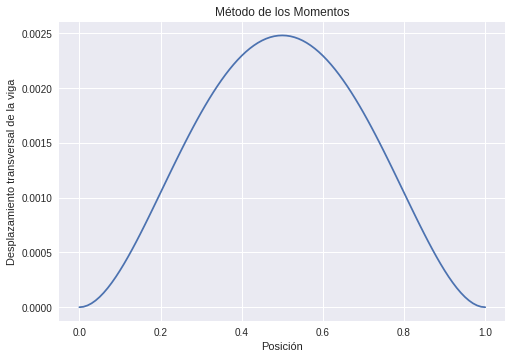

Tiempo de ejecución: 0 min. 28.445329 segs


In [12]:
#metodo de los momentos
w0=1
w1=x
w2=x**2
t1 = datetime.now()
R = d4u + u -1
ec1=integrate(R*w0, (x,0,1)) #integral del peso 1 por el residuo
print("Integral 1 del peso 1")

ec2=integrate(R*w1, (x,0,1)) #integral del peso 2 por el residuo
print("Integral 2 del peso 2")

ec3=integrate(R*w2, (x,0,1))#integral del peso 3 por el residuo
print("Integral 3 del peso 3")


u4 = graficar("los Momentos", calcular(ec1,ec2,ec3))
t = datetime.now()-t1
m = int(t.seconds/60)
print("Tiempo de ejecución: %s min. %s.%s segs" %(m,t.seconds-60*m,t.microseconds))

## Método de Galerkin
> Tiempo de procesamiento: 60 segundos aprox.

En este método se realizará lo siguiente: $$\int_0^1 W_iR(x) dx$$ donde $$W_i$$ será la derivada parcial de u con respecto a cada una de las constantes: $$\int_0^1 \frac{\partial \tilde u}{\partial a_1}R(x) dx$$ $$\int_0^1 \frac{\partial \tilde u}{\partial a_2}R(x) dx$$ $$\int_0^1 \frac{\partial \tilde u}{\partial a_3}R(x) dx$$ 

Integral 1 / 3
Integral 2 / 3
Integral 3 / 3
[[-0.01324013]
 [ 0.01325018]
 [-0.01325018]]
u(x) = -0.0132501758524756*x**3*(x - 1)*sin(pi*x) + 0.0132501758524756*x**2*(x - 1)*sin(pi*x) - 0.0132401276241142*x*(x - 1)*sin(pi*x)
Punto Max:0.002482


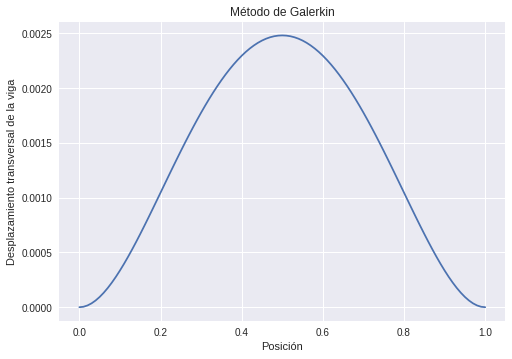

Tiempo de ejecución: 2 min. 11.206273 segs


In [13]:
#metodo de galerkin

t1 = datetime.now()
R = d4u + u -1
duda1=diff(u, a1) #derivada de u respecto a a1
x1=integrate(R*duda1, (x,0,1)) #integral de la derivada por el residuo
print("Integral 1 / 3")

duda2=diff(u, a2) #derivada de u respecto a a2
x2=integrate(R*duda2, (x,0,1)) #integral de la derivada por el residuo
print("Integral 2 / 3")

duda3=diff(u, a3) #derivada de u respecto a a3
x3=integrate(R*duda3, (x,0,1))#integral de la derivada por el residuo
print("Integral 3 / 3")

u5 = graficar("Galerkin", calcular(ec1,ec2,ec3))

t = datetime.now()-t1
m = int(t.seconds/60)
print("Tiempo de ejecución: %s min. %s.%s segs" %(m,t.seconds-60*m,t.microseconds))

## Solución Analítica
Empleando WolframAlpha determinamos la solucion de la EDO $$\frac{d⁴y}{dx⁴} + y = 1$$ con las condiciones iniciales $$y(0)=0, y(1)=0, y'(0)=0, y'(1)=0$$

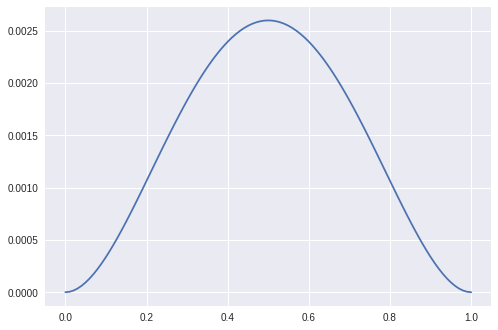

In [14]:
import sympy as sp
x = sp.symbols("x")
fun = (sp.exp(-(x/sp.sqrt(2)))*sp.csc(1/sp.sqrt(2))*(sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))-sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))-sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))+sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))+sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))+sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))-2*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))+4*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))-2*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))+2*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))-4*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))+2*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))+sp.exp(x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))-4*sp.exp(sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))+6*sp.exp(2*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))-4*sp.exp(3*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))+sp.exp(4*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))-sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+3*sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-3*sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-3*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+3*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-3*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+3*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-sp.exp(4*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-sp.exp(sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+3*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))-3*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cos(x/sp.sqrt(2))*sp.cot(1/sp.sqrt(2))+2*sp.exp(x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))-16*sp.exp(sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))+28*sp.exp(2*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))-16*sp.exp(3*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))+2*sp.exp(4*sp.sqrt(2)+x/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))-sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+7*sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-7*sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-7*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+7*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+4*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-14*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+12*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-2*sp.exp(4*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-2*sp.exp(sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+12*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))-14*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+4*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))+sp.exp(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-5*sp.exp(3/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-5*sp.exp(5/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+sp.exp(7/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+5*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+5*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-2*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+12*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-2*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+2*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2-12*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+2*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+sp.exp(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-12*sp.exp(sp.sqrt(2)+x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+38*sp.exp(2*sp.sqrt(2)+x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-12*sp.exp(3*sp.sqrt(2)+x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+sp.exp(4*sp.sqrt(2)+x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+3*sp.exp(sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-19*sp.exp(2*sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+9*sp.exp(3*sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-sp.exp(4*sp.sqrt(2))*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-sp.exp(sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+9*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-19*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3+3*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(x/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3-sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+5*sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-7*sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+3*sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+3*sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-7*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+5*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-2*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+4*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-2*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-2*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+4*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-2*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+3*sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-3*sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+3*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-3*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-3*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+3*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(4*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-3*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+3*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**3*sp.cot(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+7*sp.exp(3/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-7*sp.exp(5/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(7/sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+7*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-7*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-6*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+8*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-2*sp.exp(4*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+2*sp.exp(sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-8*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))+6*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))**2*sp.sin(1/sp.sqrt(2))*sp.sin(x/sp.sqrt(2))-sp.exp(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+9*sp.exp(3/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-19*sp.exp(5/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+3*sp.exp(7/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+3*sp.exp(1/sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-19*sp.exp(3/sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+9*sp.exp(5/sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-sp.exp(7/sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-2*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+12*sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-2*sp.exp(3*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-2*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))+12*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-2*sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.cos(1/sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2*sp.sin(x/sp.sqrt(2))-sp.exp(sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+5*sp.exp(2*sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+5*sp.exp(3*sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-sp.exp(4*sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+sp.exp(sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-5*sp.exp(sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))-5*sp.exp(2*sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))+sp.exp(3*sp.sqrt(2)+sp.sqrt(2)*x)*sp.sin(1/sp.sqrt(2))**3*sp.sin(x/sp.sqrt(2))))/((1-6*sp.exp(sp.sqrt(2))+sp.exp(2*sp.sqrt(2))+sp.cot(1/sp.sqrt(2))**2-2*sp.exp(sp.sqrt(2))*sp.cot(1/sp.sqrt(2))**2+sp.exp(2*sp.sqrt(2))*sp.cot(1/sp.sqrt(2))**2)*(sp.cos(1/sp.sqrt(2))**2-2*sp.exp(sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2+sp.exp(2*sp.sqrt(2))*sp.cos(1/sp.sqrt(2))**2+sp.sin(1/sp.sqrt(2))**2-6*sp.exp(sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2+sp.exp(2*sp.sqrt(2))*sp.sin(1/sp.sqrt(2))**2))
xi = np.arange(0,1.01,0.01)
yx = []
[yx.append(fun.subs(x,i)) for i in xi]
yx = np.array(yx).astype(np.float64)
plt.plot(xi,yx)

Max. Colocación: 0.002557
Max. Subdominios: 0.002811
Max. Mínimos cuadrados: 0.002441
Max. Momentos: 0.002482
Max. Galerkin: 0.002482
Max. Analitica: 0.002599


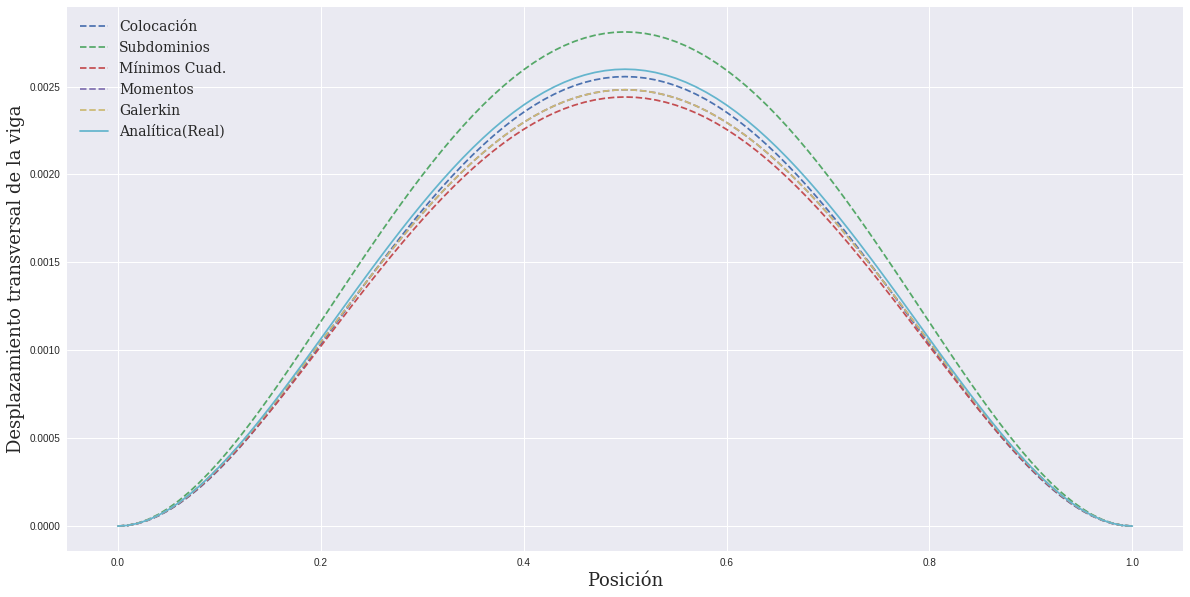

In [21]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18,
        }
plt.figure(figsize=(20,10))
plt.style.use("seaborn")
xi = np.arange(0,1.01,0.01)


a=plt.plot(xi,u1,'--',label="Colocación")
b=plt.plot(xi,u2,'--',label="Subdominios")
c=plt.plot(xi,u3,'--',label="Mínimos Cuad.")
d=plt.plot(xi,u4,'--',label="Momentos")
e=plt.plot(xi,u5,'--',label="Galerkin")
plt.plot(xi,yx,label="Analítica(Real)")

m1 = np.max(u1)
m2 = np.max(u2)
m3 = np.max(u3)
m4 = np.max(u4)
m5 = np.max(u5)
anal= np.max(yx)
print("Max. Colocación: %f"% m1)
print("Max. Subdominios: %f"% m2)
print("Max. Mínimos cuadrados: %f"% m3)
print("Max. Momentos: %f"% m4)
print("Max. Galerkin: %f"% m5)
print("Max. Analitica: %f"% anal)

plt.legend()
plt.legend(loc=2, prop={'family': 'serif','size': 14})
plt.xlabel('Posición',fontdict=font)
plt.ylabel('Desplazamiento transversal de la viga',fontdict=font)
plt.show()

## Error Relativo en el punto máximo


In [30]:
e1=e2=e3=e4=e5=0
for i in range(100):
    e1 = anal-m1
    e2 = anal-m2
    e3 = anal-m3
    e4 = anal-m4
    e5 = anal-m5
    
print("error de colocacion:%s"%(str(e1)))
print("error de subdominios:%f"%(str(e2)))
print("error de mínimos cuadrados:%s"%(str(e3)))
print("error de metodo de los momentos:%s"%(str(e4)))
print("error de galerkin:%s"%(str(e5)))


error de colocacion:4.214994250798486e-05
error de mínimos cuadrados:0.00015799468801640628
error de metodo de los momentos:0.0001170173723253733
error de galerkin:0.0001170173723253733
